# Importing Required Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

# Data Preprocessing

In [5]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train =  x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Model Training 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [14]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2041 - accuracy: 0.9408 - val_loss: 0.0762 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0724 - accuracy: 0.9791 - val_loss: 0.0622 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0497 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0500 - val_accuracy: 0.9844


# Model Evaluation

In [15]:
from sklearn.metrics import classification_report

In [23]:
predictions = model.predict_classes(x_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



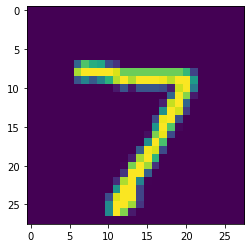

In [27]:
# Now predicting class on digit by single image

number = x_test[0]
plt.imshow(number.reshape(28,28))

In [29]:
model.predict_classes(number.reshape(1,28,28,1))

array([7], dtype=int64)